# The Sparks Foundation (Data Science and Business Analytics)

#### by Shawn JP

## Task: Prediction using Unsupervised learning                                                           

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Reading the iris dataset

In [30]:
iris=pd.read_csv('iris.csv')
iris.head(-1)    #display the data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica


## Finding the optimum number of clusters in the iris dataset

Here we use a technique called the 'Elbow method'. The optimum number of clusters is where the 'elbow' in the graph occurs.

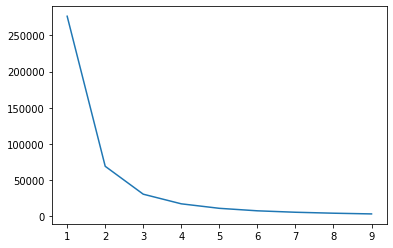

In [23]:
from sklearn.cluster import KMeans

dataset=pd.read_csv('iris_no_label.csv')
X=dataset.iloc[:,[3,4]].values

distances=[]

optimal=1
for i in range(1,10):
    kn=KMeans(n_clusters=i)
    kn=kn.fit(dataset)
    distances.append(kn.inertia_)
    if i>1:
        ratio=distances[i-1]/distances[i-2]
        if ratio<0.55:
            optimal=i
            
plt.plot(range(1,10),distances)
plt.show()
plt.title('The Elbow Method')


Here we find that the 'elbow' occurs when k=3. Therefore optimum number of clusters is 3.

## Dendrogram

Dendrograms are yet another method used in cluster classification. Here too we see there are 3 distinct clusters.

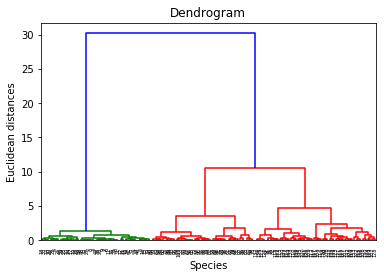

In [24]:
import scipy.cluster.hierarchy as sch
dendrogram= sch.dendrogram(sch.linkage(X,method='ward'))

plt.title('Dendrogram')
plt.xlabel('Species')
plt.ylabel('Euclidean distances')
plt.show()

## Using KMeans to predict the ouput

In [25]:
hc=KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 3)
y_hc=hc.fit_predict(X)


## Visualization of data

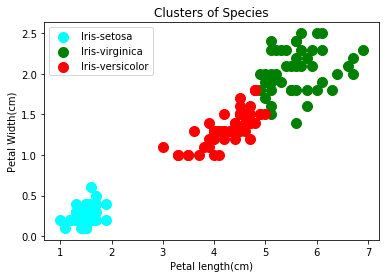

In [31]:
plt.scatter(X[y_hc ==0,0], X[y_hc ==0,1], s=100,c='cyan',label="Iris-setosa")
plt.scatter(X[y_hc ==1,0], X[y_hc ==1,1], s=100,c='green',label="Iris-virginica")
plt.scatter(X[y_hc ==2,0], X[y_hc ==2,1], s=100,c='red',label="Iris-versicolor")
plt.title('Clusters of Species')
plt.xlabel('Petal length(cm)')
plt.ylabel('Petal Width(cm)')
plt.legend()
plt.show()


The above visualization compares the Petal length to the Petal width for the 3 species in the iris dataset.